# Principal Component Analysis (PCA)

In [1]:
#Import all important libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#simulate data using scikit-learn’s make-blobs module in sklearn.datasets.
# load make_blobs to simulate data
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [4]:
#Ref: https://learn.cabrini.edu/bbcswebdav/pid-698755-dt-content-rid-4845785_1/xid-4845785_1
#Let's generate 100 x 10 matrix data, such that there are 100 samples with
#10 observations. These 100 samples were generated from four different clusters. 
X1, Y1 = make_blobs(n_features=10,
 n_samples=100,
 centers=4, random_state=4,
 cluster_std=2)
print(X1.shape)

(100, 10)


In [5]:
# X1 is the 100 x 10 data and Y1 is cluster assignment for the 100 samples. 
#Let's create a PCA model with 4 components from sklearn.decomposition
pca = decomposition.PCA(n_components=4)
# let's fit PCA model using fit_transform function to our data X1 and the result pc contains the principal components
pc = pca.fit_transform(X1)

In [6]:
#Let us make a pandas data frame with the principal components (PCs) and the known cluster assignments.
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0


In [7]:
#Let us examine the variance explained by each principal component. We can clearly see that
#the first two principal components explains over 70% of the variation in the data.
print(pca.explained_variance_ratio_)

[0.41594854 0.3391866  0.1600729  0.02016822]


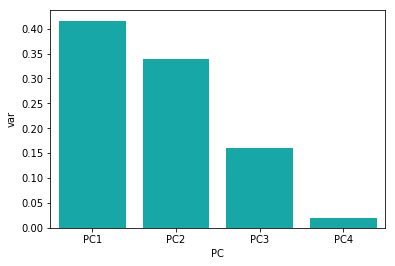

In [8]:
#Let us plot the variance explained by each principal component. This is also called Scree plot
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
 'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var",
 data=df, color="c")

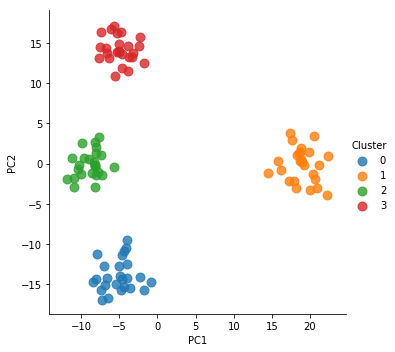

In [9]:
#Seaborn’s lmplot to make the PCA plot using the fit_reg=False option and color clusters with ‘hue’
sns.lmplot( x="PC1", y="PC2",
 data=pc_df,
 fit_reg=False,
 hue='Cluster', # color by cluster
 legend=True,
 scatter_kws={"s": 80}) # specify the point size

# PCA for Iris Dataset (Module 6 Assignment)

In [10]:
#load data 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#Read data from the provided file into a DataFrame read_csv
df_iris = pd.read_csv(url, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'])
df_iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#let us standardize the data before we apply PCA
from sklearn.preprocessing import StandardScaler
features = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

#let's get the values of the features of data(Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width')
X1 = df_iris.loc[:, features].values
#target will be the Name 
Y1 = df_iris[['Name']]

In [12]:
# Standardizing the features using StandardScaler 
X1 = StandardScaler().fit_transform(X1 )

In [13]:
#Let's create a PCA model with 4 components from sklearn.decomposition
pca2 = decomposition.PCA(n_components=4)

In [14]:
# PCA model using fit_transform function to our data X1 and the result pc contains the principal components.
pc = pca2.fit_transform(X1)

In [15]:
#Let us make a pandas data frame with the principal components (PCs) and the known cluster assignments
pca_df = pd.DataFrame(data = pc , columns =  ['PC1', 'PC2','PC3','PC4'])
pca_df['Cluster'] = Y1

pca_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


In [16]:
#Let us examine the variance explained by each principal component. We can clearly see that
#the first two principal components explains over 70% of the variation in the data.
print(pca2.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


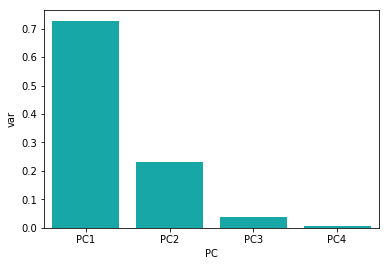

In [17]:
#Let us plot the variance explained by each principal component. This is also called Scree plot.
df = pd.DataFrame({'var':pca2.explained_variance_ratio_,
 'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var",
 data=df, color="c")

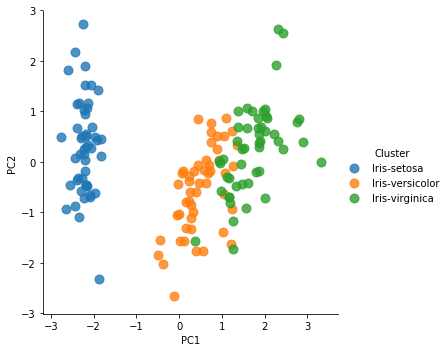

In [18]:
#use the top two principal components and make scatter plot. We will use
#Seaborn’s lmplot to make the PCA plot using the fit_reg=False option and color clusters with ‘hue’
sns.lmplot( x="PC1", y="PC2",
 data=pca_df,
 fit_reg=False,
 hue='Cluster', # color by cluster
 legend=True,
 scatter_kws={"s": 80}) # specify the point size